In [15]:
import numpy as np
import pandas as pd
import tslearn
from tslearn.clustering import TimeSeriesKMeans
from datetime import datetime
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime

In [56]:
!pip install h5py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 60.1 MB/s eta 0:00:00m eta 0:00:010:01


In [26]:
core=["AAABBBBAAA", "AAABBAAA","AAACCCAAA", "AAABBBBAAA", "AABBBBAA", "ABCABC", "CBACBA", "ACBACB"]

In [27]:
extended=['FDDDGFECBCG', 'BDGGGGBCCCFF', 'GCCDGBGGG', 'FBAGGCFDEACF', 'GDGBFDEEBCFA', 'FFCCCCCCE', 'FAAFCCGEB', 'ECDEFFDADACF', 'CDGADFGADEDF', 'BDCBECDGCDDB', 'AFBDGGEGEECA', 'GBCFFEGBDDCG', 'CCEFEEAEBCCA']

In [28]:
more_extended=['EEBBFFEE', 'BBBEEEFFBBGG', 'AACCFFFBBDDD', 'CCCEED', 'AAACCCAAGGGF', 'FFFBBDD', 'BBBEEE', 'EEGGGBBGGEED', 'DDDFFFAAD', 'FFFCCCDD', 'BBBDDD', 'FFGGEEGGG', 'EEEBBBA', 'CCCBBBDDBBBE', 'FFFBBBDDCCCG', 'AAAEEB', 'CCDDCCFF', 'DDBBAAFFFBB', 'BBBGGCC', 'FFAAAEEEBBAA', 'GGBBBCCB', 'FFBBBD', 'GGAAAG', 'DDDAAA', 'FFFGGA', 'EEECCCGGF', 'AABBBC', 'CCCBBAAABBCC', 'DDCCGG']


In [41]:
data_lst=core+extended+more_extended
data_lst

['AAABBBBAAA',
 'AAABBAAA',
 'AAACCCAAA',
 'AAABBBBAAA',
 'AABBBBAA',
 'ABCABC',
 'CBACBA',
 'ACBACB',
 'FDDDGFECBCG',
 'BDGGGGBCCCFF',
 'GCCDGBGGG',
 'FBAGGCFDEACF',
 'GDGBFDEEBCFA',
 'FFCCCCCCE',
 'FAAFCCGEB',
 'ECDEFFDADACF',
 'CDGADFGADEDF',
 'BDCBECDGCDDB',
 'AFBDGGEGEECA',
 'GBCFFEGBDDCG',
 'CCEFEEAEBCCA',
 'EEBBFFEE',
 'BBBEEEFFBBGG',
 'AACCFFFBBDDD',
 'CCCEED',
 'AAACCCAAGGGF',
 'FFFBBDD',
 'BBBEEE',
 'EEGGGBBGGEED',
 'DDDFFFAAD',
 'FFFCCCDD',
 'BBBDDD',
 'FFGGEEGGG',
 'EEEBBBA',
 'CCCBBBDDBBBE',
 'FFFBBBDDCCCG',
 'AAAEEB',
 'CCDDCCFF',
 'DDBBAAFFFBB',
 'BBBGGCC',
 'FFAAAEEEBBAA',
 'GGBBBCCB',
 'FFBBBD',
 'GGAAAG',
 'DDDAAA',
 'FFFGGA',
 'EEECCCGGF',
 'AABBBC',
 'CCCBBAAABBCC',
 'DDCCGG']

In [6]:
path_0n20="./network_test/dtw/prom/not_n_rpkm20/cp1_init_df.csv"
path_0n30="./network_test/dtw/prom/not_n_rpkm30/cp1_init_df.csv"
path_0n50="./network_test/dtw/prom/not_n_rpkm50/cp1_init_df.csv"

In [12]:
df20=pd.read_csv(path_0n20)
df30=pd.read_csv(path_0n30)
df50=pd.read_csv(path_0n50)

lst20=df20["motif"].to_list()
lst30=df30["motif"].to_list()
lst50=df50["motif"].to_list()

In [13]:
data_lst=lst20+lst30+lst50

In [16]:
data_lst

['EEEEEE',
 'DDDEEE',
 'EEEEE',
 'BBGGG',
 'EEEEEEE',
 'AAAAA',
 'DEEEEE',
 'ABBBB',
 'EEEEEEEEE',
 'DEEEEEE',
 'BBBBBAA',
 'DDDDDDD',
 'CCFFF',
 'EEEEF',
 'GGGGGG',
 'EEEEEEEEEE',
 'DDDDEEEEEEE',
 'EEEEEED',
 'CCCCCC',
 'EEEEEEEEED',
 'GGEEEE',
 'DDDDDDDEEE',
 'EEEEEEEEEEE',
 'DDDDEEEEEE',
 'EEEEEEEE',
 'AAEEE',
 'BBBBB',
 'DDDEE',
 'CCCCC',
 'GBBBA',
 'EEEAAA',
 'DFFFF',
 'GBBBB',
 'CCFFFF',
 'EEEEEDDD',
 'FFFFF',
 'FFFFFFD',
 'EEEAA',
 'DDDDD',
 'OOOAAAAA',
 'EEEEEEEEEDDD',
 'EEEEDDD',
 'AAAEEEEE',
 'AAAAEEEE',
 'BBAAA',
 'EEEEEEEE',
 'DDDDE',
 'EEEAAAA',
 'EEEEEEEED',
 'FFFFFFFFF',
 'FFFFFFF',
 'FFFFFF',
 'DDDDDD',
 'AAABB',
 'EEEEEED',
 'OOOAAA',
 'GBBAA',
 'BBBBB',
 'EEDDD',
 'EEEEEEE',
 'EEEEE',
 'CFFFF',
 'ABBBB',
 'CCFFFFF',
 'AAABBBB',
 'BBBAAA',
 'EEEDDD',
 'AAAEE',
 'AAAAA',
 'EEEED',
 'FFFFFFFFFFF',
 'GBBBAA',
 'DDDEEEE',
 'CCAAA',
 'GGBBB',
 'FFFFFD',
 'BBBBA',
 'CCCAA',
 'AAAAA',
 'AAAAAAAAAEEE',
 'EEEEEEEEDD',
 'BAAAAA',
 'EEEED',
 'FFFFFFFFF',
 'FFFFFFF',
 'AAAAAA',
 '

In [17]:
# letter_to_num = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
letter_to_num = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'J': 10,
    'K': 11,
    'L': 12,
    'M': 13,
    'N': 14,
    'O': 15
}

In [18]:
def convert_sequence(sequence, mapping):
    return [mapping[letter] for letter in sequence]

numerical_sequences = [convert_sequence(seq, letter_to_num) for seq in data_lst]


In [19]:
numerical_sequences

[[5, 5, 5, 5, 5, 5],
 [4, 4, 4, 5, 5, 5],
 [5, 5, 5, 5, 5],
 [2, 2, 7, 7, 7],
 [5, 5, 5, 5, 5, 5, 5],
 [1, 1, 1, 1, 1],
 [4, 5, 5, 5, 5, 5],
 [1, 2, 2, 2, 2],
 [5, 5, 5, 5, 5, 5, 5, 5, 5],
 [4, 5, 5, 5, 5, 5, 5],
 [2, 2, 2, 2, 2, 1, 1],
 [4, 4, 4, 4, 4, 4, 4],
 [3, 3, 6, 6, 6],
 [5, 5, 5, 5, 6],
 [7, 7, 7, 7, 7, 7],
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
 [4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 4],
 [3, 3, 3, 3, 3, 3],
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 4],
 [7, 7, 5, 5, 5, 5],
 [4, 4, 4, 4, 4, 4, 4, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
 [4, 4, 4, 4, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [1, 1, 5, 5, 5],
 [2, 2, 2, 2, 2],
 [4, 4, 4, 5, 5],
 [3, 3, 3, 3, 3],
 [7, 2, 2, 2, 1],
 [5, 5, 5, 1, 1, 1],
 [4, 6, 6, 6, 6],
 [7, 2, 2, 2, 2],
 [3, 3, 6, 6, 6, 6],
 [5, 5, 5, 5, 5, 4, 4, 4],
 [6, 6, 6, 6, 6],
 [6, 6, 6, 6, 6, 6, 4],
 [5, 5, 5, 1, 1],
 [4, 4, 4, 4, 4],
 [15, 15, 15, 1, 1, 1, 1, 1],
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4],
 [5, 5, 5, 5, 4, 4, 4],
 [1, 1, 1, 5, 5, 5,

In [20]:
df_sequences = pd.DataFrame(numerical_sequences)

In [21]:
df_sequences = df_sequences.astype('Int64')
df_test=df_sequences.T
df_test

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,5,4,5,2,5,1,4,1,5,4,...,7,3,7,2,1,6,6,1,2,1
1,5,4,5,2,5,1,5,2,5,5,...,2,3,7,2,1,6,6,1,2,1
2,5,4,5,7,5,1,5,2,5,5,...,1,3,2,1,1,4,3,1,1,1
3,5,5,5,7,5,1,5,2,5,5,...,1,3,1,1,1,4,3,1,1,1
4,5,5,5,7,5,1,5,2,5,5,...,1,3,1,1,1,4,3,1,1,1
5,5,5,<NA>,<NA>,5,<NA>,5,<NA>,5,5,...,1,6,1,<NA>,5,<NA>,<NA>,3,1,1
6,<NA>,<NA>,<NA>,<NA>,5,<NA>,<NA>,<NA>,5,5,...,<NA>,<NA>,<NA>,<NA>,5,<NA>,<NA>,3,<NA>,1
7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5,<NA>,...,<NA>,<NA>,<NA>,<NA>,5,<NA>,<NA>,3,<NA>,<NA>
8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3,<NA>,<NA>
9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3,<NA>,<NA>


In [22]:
# Add an 'entry' column at the beginning of the DataFrame with labels 'Entry 1', 'Entry 2', etc.
df_test.insert(0, 'position', ['Pos ' + str(i+1) for i in range(df_test.shape[0])])

In [23]:
df_test

,position,0,1,2,3,4,5,6,7,8,...,106,107,108,109,110,111,112,113,114,115
0,Pos 1,5,4,5,2,5,1,4,1,5,...,7,3,7,2,1,6,6,1,2,1
1,Pos 2,5,4,5,2,5,1,5,2,5,...,2,3,7,2,1,6,6,1,2,1
2,Pos 3,5,4,5,7,5,1,5,2,5,...,1,3,2,1,1,4,3,1,1,1
3,Pos 4,5,5,5,7,5,1,5,2,5,...,1,3,1,1,1,4,3,1,1,1
4,Pos 5,5,5,5,7,5,1,5,2,5,...,1,3,1,1,1,4,3,1,1,1
5,Pos 6,5,5,<NA>,<NA>,5,<NA>,5,<NA>,5,...,1,6,1,<NA>,5,<NA>,<NA>,3,1,1
6,Pos 7,<NA>,<NA>,<NA>,<NA>,5,<NA>,<NA>,<NA>,5,...,<NA>,<NA>,<NA>,<NA>,5,<NA>,<NA>,3,<NA>,1
7,Pos 8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5,...,<NA>,<NA>,<NA>,<NA>,5,<NA>,<NA>,3,<NA>,<NA>
8,Pos 9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3,<NA>,<NA>
9,Pos 10,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3,<NA>,<NA>


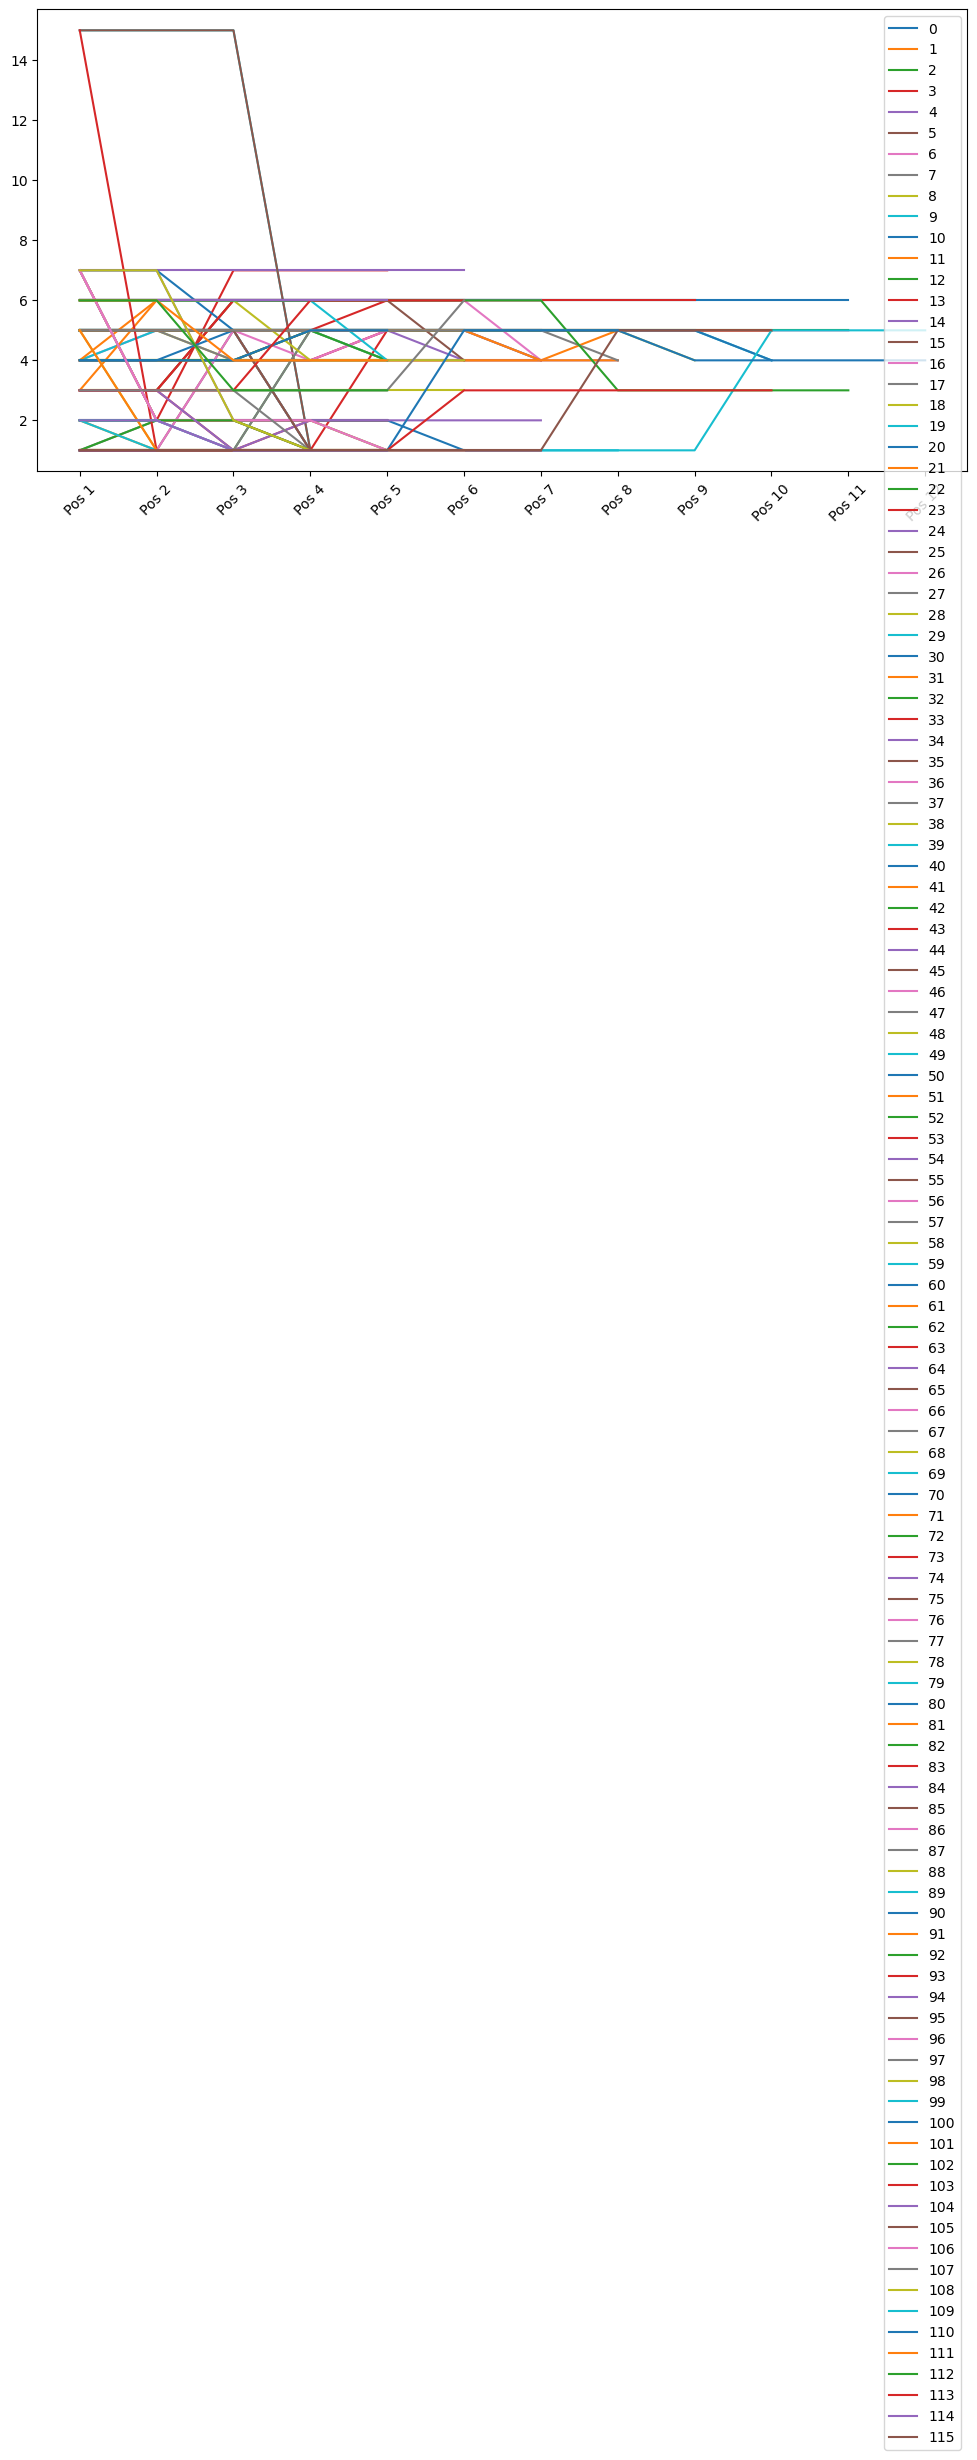

In [24]:
# Set the figure size
rcParams["figure.figsize"] = 12, 6

# Create a figure and a single subplot
fig, ax = plt.subplots()

# Get list of columns to plot, excluding the 'entry' column
item_list = df_test.columns.tolist()[1:]

# Plot each item column against the 'entry' column
for item in item_list:
    ax.plot(df_test['position'], df_test[item].astype(float), label=str(item))  # Convert to float for NaN compatibility

# Set x-tick labels with rotation, convert 'entry' values to string if they are not already
ax.set_xticks(range(len(df_test['position'])))
ax.set_xticklabels(df_test['position'].astype(str), rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [29]:
X_train = df_test.loc[:, df_test.columns != 'position']

In [30]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd

# Set the figure size and legend location
rcParams["figure.figsize"] = 12, 6
rcParams["legend.loc"] = 'upper right'

# Assuming df_test is your DataFrame and y_pred is your array of predicted cluster labels
item_list = df_test.columns.tolist()[1:]
colors = pd.DataFrame(y_pred).replace(0, "b").replace(1, "r").replace(2, "g")

# Create a figure and a subplot
fig, ax = plt.subplots()

# Plot each item with its corresponding color and label
for index, item in enumerate(item_list):
    # Convert the series to float to handle NaN values properly
    series_to_plot = df_test[item].astype(float)
    ax.plot(df_test["position"], series_to_plot, label=str(item)+"_cluster"+str(y_pred[index]), color=colors.iloc[index, 0])

# Set x-tick labels with rotation, ensuring position is converted to string to avoid any type issues
ax.set_xticks(df_test["position"])
ax.set_xticklabels(df_test["position"].astype(str), rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


NameError: name 'y_pred' is not defined

In [135]:
### Additional step to produce the dtw result matrix
from tslearn.metrics import dtw
import numpy as np

# Fill missing values with zero
X_train_filled = X_train.fillna(0)

# Then proceed with the DTW distance matrix computation
n_series = X_train_filled.shape[0]
dtw_distance_matrix = np.zeros((n_series, n_series))

for i in range(n_series):
    for j in range(i, n_series):  # No need to compute the distance twice for (i, j) and (j, i)
        distance = dtw(X_train_filled[i], X_train_filled[j])
        dtw_distance_matrix[i, j] = distance
        dtw_distance_matrix[j, i] = distance



In [136]:
dtw_distance_matrix

array([[ 0.        ,  1.73205081,  0.        ,  5.83095189,  0.        ,
         9.79795897,  1.        ,  7.81024968,  0.        ,  1.        ,
         7.48331477,  2.64575131],
       [ 1.73205081,  0.        ,  1.73205081,  4.89897949,  1.73205081,
         8.66025404,  0.        ,  6.63324958,  1.73205081,  0.        ,
         6.40312424,  1.73205081],
       [ 0.        ,  1.73205081,  0.        ,  5.47722558,  0.        ,
         8.94427191,  1.        ,  7.21110255,  0.        ,  1.        ,
         6.8556546 ,  2.64575131],
       [ 5.83095189,  4.89897949,  5.47722558,  0.        ,  6.164414  ,
        10.48808848,  5.29150262,  8.71779789,  6.78232998,  5.65685425,
         8.77496439,  6.55743852],
       [ 0.        ,  1.73205081,  0.        ,  6.164414  ,  0.        ,
        10.58300524,  1.        ,  8.36660027,  0.        ,  1.        ,
         8.06225775,  2.64575131],
       [ 9.79795897,  8.66025404,  8.94427191, 10.48808848, 10.58300524,
         0.        ,  

In [106]:
# DTW-k-means

seed=111

start_time = datetime.now()
print("DTW k-means")
# dba_km = TimeSeriesKMeans(n_clusters=3,
dba_km = TimeSeriesKMeans(n_clusters=11,
    n_init=10, #2,  # number of time you run with different initial centroid 
    metric="dtw",
    verbose=False, #True,
    max_iter_barycenter=10,
    random_state=seed)
y_pred = dba_km.fit_predict(X_train.T)
print(y_pred)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

DTW k-means
[ 6  0  6  9  6  1  0 10  6  0  1  0  9  6  4  6  0  6 10  6  6  0  6  0
  6  5 10  0 10  3  7  4  3  9  6  4  8  7  0  2  6  6  5  5  1  6  0  7
  6  4  4  4  0 10  6  2  3 10  6  6  6  9 10  9 10  1  6  5  1  6  4  3
  0  1  3  8  1  1  1  5  6  1  6  4  4  1  5  6  8  8  0  6  1  2  1  7
  3  6  7  1  0  7  8  9  4  5  3  9  3  1  5  8  8 10  1  1]
Duration: 0:00:10.775119


/home/lee/anaconda3/envs/sandbox/lib/python3.8/site-packages/umap/umap_.py:1857: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/lee/anaconda3/envs/sandbox/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


ValueError: 'c' argument has 116 elements, which is inconsistent with 'x' and 'y' with size 12.

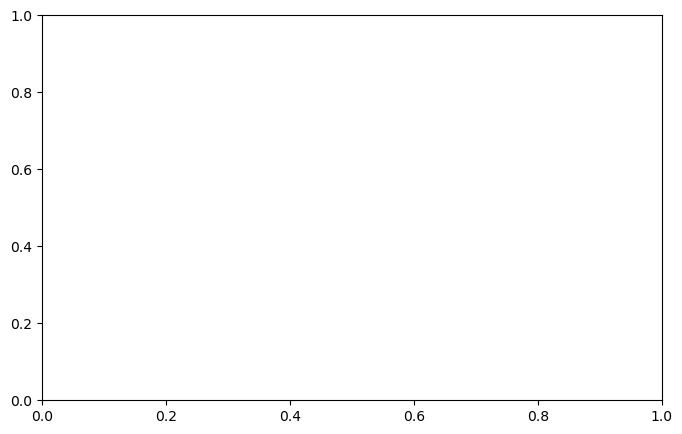

In [176]:
from umap import UMAP
import matplotlib.pyplot as plt

# Choose one of the NaN handling strategies mentioned above
# For example, mean imputation:
X_train = X_train.astype('float64')  # Convert to float64

X_filled = X_train.fillna(X_train.mean())

# Now apply UMAP on the cleaned data
umap_reducer = UMAP(n_neighbors=5, min_dist=0.3, metric='precomputed', random_state=seed)
# umap_embedding = umap_reducer.fit_transform(X_filled.T)  # Ensure the data is transposed if necessary
# Assuming dtw_distance_matrix is a 2D numpy array with the DTW distances
# 

In [ ]:
umap_embedding = umap_reducer.fit_transform(dtw_distance_matrix)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=y_pred, cmap='Spectral', s=50)
plt.title('UMAP Projection After K-mean clustering', fontsize=20)
plt.colorbar(label='Cluster label')
plt.xlabel('UMAP Dimension 1', fontsize=15)
plt.ylabel('UMAP Dimension 2', fontsize=15)
plt.show()


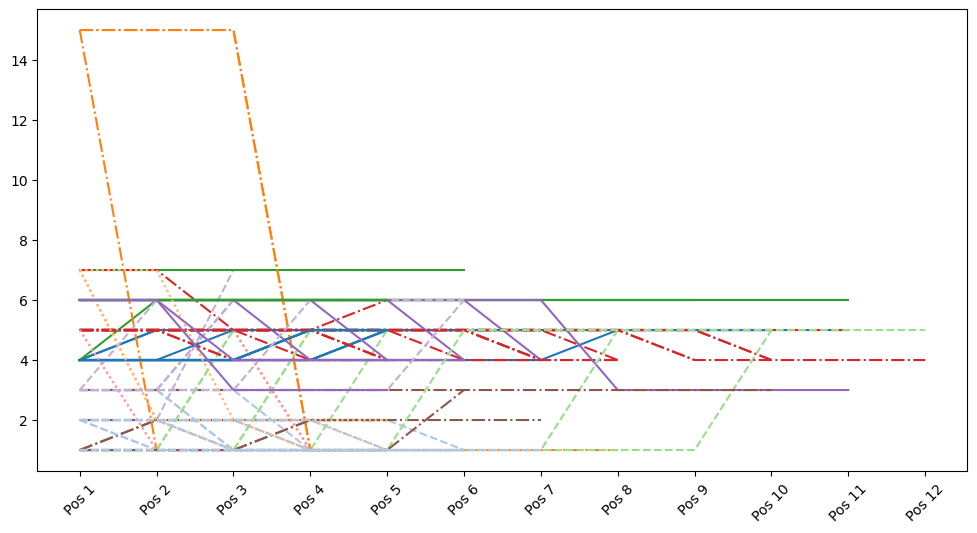

In [112]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the figure size and legend location
rcParams["figure.figsize"] = 12, 6
rcParams["legend.loc"] = 'upper right'

# Assuming df_test is your DataFrame and y_pred is your array of predicted cluster labels
item_list = df_test.columns.tolist()[1:]

# Define colors and line styles for each cluster
# cluster_colors = {0: (0.098, 0.098, 0.439),  # Midnight Blue
#                   1: (0.0, 0.502, 0.502),   #teal
# #                   1: (0.392, 0.584, 0.929),  # Cornflower Blue
#                   2: (0.678, 0.847, 0.902)}  # Light Blue
# cluster_colors = {
#     0: (1.0, 0.5, 0.31),    # Coral
#     1: (0.18, 0.55, 0.34),  # Sea Green
#     2: (0.85, 0.44, 0.84),  # Orchid
#     3: (0.95, 0.64, 0.38),  # Sandy Brown
#     4: (0.39, 0.58, 0.93),  # Cornflower Blue
#     5: (0.85, 0.75, 0.85),   # Thistle
#     6: (0.42, 0.56, 0.14)   # Olive Drab
# }
cluster_colors = {
    0: (0.12, 0.47, 0.71),    # Blue
    1: (0.68, 0.78, 0.91),    # Light Blue
    2: (1.0, 0.50, 0.05),     # Orange
    3: (1.0, 0.73, 0.47),     # Light Orange
    4: (0.17, 0.63, 0.17),    # Green
    5: (0.60, 0.87, 0.54),    # Light Green
    6: (0.84, 0.15, 0.16),    # Red
    7: (1.0, 0.60, 0.59),     # Light Red
    8: (0.58, 0.40, 0.74),    # Purple
    9: (0.77, 0.69, 0.84),    # Light Purple
    10: (0.55, 0.34, 0.29)    # Brown
}




# cluster_linestyles = {0: '-',  #  line
#                       1: '-.',   # Dotted line
#                       2: '--'}  # Dashed line
# cluster_linestyles = {
#     0: '-',  # Solid line
#     1: '--', # Dashed line
#     2: '-.', # Dash-dot line
#     3: ':',  # Dotted line
#     4: (0, (3, 1, 1, 1)),  # Dash-dot-dot line
#     5: (0, (5, 5)),  # Long dashed line
#     6: ':',
# }
from itertools import cycle

# Define a list of linestyles
linestyles = ['-', '--', '-.', ':']

# Create a cycle object from the linestyles list
linestyle_cycle = cycle(linestyles)

# Assign a linestyle to each cluster, cycling through the available styles
number_of_clusters=11
cluster_linestyles = {i: next(linestyle_cycle) for i in range(number_of_clusters)}


# Create a figure and a subplot
fig, ax = plt.subplots()

# Plot each item with its corresponding color and line style
for index, item in enumerate(item_list):
    color = cluster_colors[y_pred[index]]
    linestyle = cluster_linestyles[y_pred[index]]
    ax.plot(df_test["position"], df_test[item].astype('float'), 
            label=str(item)+"_cluster"+str(y_pred[index]), 
            color=color, linestyle=linestyle)

# Set x-tick labels with rotation
ax.set_xticks(df_test["position"])
ax.set_xticklabels(df_test["position"].astype(str), rotation=45)

# Add a legend
# plt.legend()

# Show the plot
plt.show()


In [113]:
import pandas as pd

# Transpose df_test so that each entry becomes a row
df_test_transposed = df_test.T  # or df_test.transpose()

# The first row will likely contain something other than data (e.g., time points), so let's keep it as a header
new_header = df_test_transposed.iloc[0]  # Grab the first row for the header
df_test_transposed = df_test_transposed[1:]  # Take the data less the header row
df_test_transposed.columns = new_header  # Set the header row as the df header

# Reset the index to make the entries into a column
df_test_transposed.reset_index(inplace=True)

# Rename the 'index' column to something more descriptive, like 'Entry'
df_test_transposed.rename(columns={'index': 'Entry'}, inplace=True)

# Add the cluster labels as a new column
df_test_transposed['Cluster'] = y_pred

# Sort the DataFrame by the 'Cluster' column
df_sorted_by_cluster = df_test_transposed.sort_values(by='Cluster')

# Reset the index of the sorted DataFrame
df_sorted_by_cluster.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
df_sorted_by_cluster


position,Entry,Pos 1,Pos 2,Pos 3,Pos 4,Pos 5,Pos 6,Pos 7,Pos 8,Pos 9,Pos 10,Pos 11,Pos 12,Cluster
0,11,4,4,4,4,4,4,4,<NA>,<NA>,<NA>,<NA>,<NA>,0
1,21,4,4,4,4,4,4,4,5,5,5,<NA>,<NA>,0
2,27,4,4,4,5,5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
3,38,4,4,4,4,4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
4,16,4,4,4,4,5,5,5,5,5,5,5,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,28,3,3,3,3,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,10
112,53,1,1,1,2,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,10
113,62,1,2,2,2,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,10
114,7,1,2,2,2,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,10


In [114]:
# Reverse the letter_to_num mapping
num_to_letter = {v: k for k, v in letter_to_num.items()}

# Function to convert a series of numbers to a letter string, ignoring NaNs
def series_to_letters(series):
    return ''.join([num_to_letter.get(x, '') for x in series if pd.notna(x)])

# Apply the conversion to each row (excluding the 'Cluster' column) and add the result to a new column
df_sorted_by_cluster['LetterSequence'] = df_sorted_by_cluster.drop('Cluster', axis=1).apply(series_to_letters, axis=1)

# Group by 'Cluster' and aggregate 'LetterSequence' into lists
clustered_sequences = df_sorted_by_cluster.groupby('Cluster')['LetterSequence'].apply(list).reset_index()

# Display the result
clustered_sequences


,Cluster,LetterSequence
0,0,"[KDDDDDDD, DDDDDDDEEE, DDDEE, DDDDD, DDDDEEEEE..."
1,1,"[CCCAA, BBBBA, AAAAA, BBAAAA, BBAAA, CCAAA, BA..."
2,2,"[OAAAA, OOOAAA, OOOAAAAA]"
3,3,"[GBBBB, GGBBB, GBBAA, GGBAAA, GBAAAAA, GBBBAA,..."
4,4,"[FFFFFFFFF, FFFFF, FFFFFFF, DFFFF, FFFFFFFFFFF..."
5,5,"[AAAAAEEE, AAEEE, AAAAEEEE, AAAEEEEE, AAAEE, A..."
6,6,"[EEEEEEDD, EEEEEEEEDD, EEEEEEED, EEEED, EEEED,..."
7,7,"[EEEAAAA, EEEAA, EAAAAA, EEEAAA, EEEAAAA, EAAAA]"
8,8,"[FFFFFFFCCCC, FFDDD, FFFDDD, FFFFFFD, FFCCC, F..."
9,9,"[CBBGGG, CCFFFF, CFFFF, CCCFFF, LCCFFF, CCFFFF..."


In [115]:
clustered_sequences["LetterSequence"].iloc[0]

['KDDDDDDD',
 'DDDDDDDEEE',
 'DDDEE',
 'DDDDD',
 'DDDDEEEEEEE',
 'DDDDE',
 'DDDEE',
 'DDEEE',
 'IDEEEEEE',
 'DDDDEEEEEE',
 'FDEEEEE',
 'DDDEEEE',
 'ADDDEEE',
 'DDDDDD']

In [116]:
clustered_sequences["LetterSequence"].iloc[1]

['CCCAA',
 'BBBBA',
 'AAAAA',
 'BBAAAA',
 'BBAAA',
 'CCAAA',
 'BAAAAA',
 'AAAAAA',
 'AAAAA',
 'AAAAAAA',
 'BBBAAA',
 'BBBAA',
 'JBBBBBAA',
 'BAAAA',
 'CCAAA',
 'EAAAAA',
 'BBAAA']

In [117]:
clustered_sequences["LetterSequence"].iloc[2]

['OAAAA', 'OOOAAA', 'OOOAAAAA']

In [118]:
clustered_sequences["LetterSequence"].iloc[3]

['GBBBB', 'GGBBB', 'GBBAA', 'GGBAAA', 'GBAAAAA', 'GBBBAA', 'GBBBA', 'GBAAAA']

In [119]:
clustered_sequences["LetterSequence"].iloc[4]

['FFFFFFFFF',
 'FFFFF',
 'FFFFFFF',
 'DFFFF',
 'FFFFFFFFFFF',
 'NGGGGGG',
 'FFFFF',
 'FFFFFFFFF',
 'FFFFFFF',
 'FFFFFF']

In [120]:
clustered_sequences["LetterSequence"].iloc[5]

['AAAAAEEE',
 'AAEEE',
 'AAAAEEEE',
 'AAAEEEEE',
 'AAAEE',
 'AAEEE',
 'AAAAAAAEEE',
 'AAAAAAAAAEEE']

In [121]:
clustered_sequences["LetterSequence"].iloc[6]

['EEEEEEDD',
 'EEEEEEEEDD',
 'EEEEEEED',
 'EEEED',
 'EEEED',
 'EEDDD',
 'EEEEEE',
 'EEEEEEEE',
 'EEEDDD',
 'BEEEEE',
 'EEEEEEEEED',
 'DEEEEEEE',
 'EEEEEED',
 'EEEEEDDD',
 'EEEEEEEEEDDD',
 'EEEEEEEEEEE',
 'EEEEEEEE',
 'EEEEDDD',
 'OEEEEEEEEEE',
 'MEEEEF',
 'EEEEEED',
 'EEDDD',
 'EEEEEEE',
 'EEEEE',
 'HEEEEEEEEE',
 'EEEEEEEED',
 'GGEEEE']

In [122]:
clustered_sequences["LetterSequence"].iloc[7]

['EEEAAAA', 'EEEAA', 'EAAAAA', 'EEEAAA', 'EEEAAAA', 'EAAAA']

In [123]:
clustered_sequences["LetterSequence"].iloc[8]

['FFFFFFFCCCC', 'FFDDD', 'FFFDDD', 'FFFFFFD', 'FFCCC', 'FFFFFD', 'FFFFD']

In [124]:
clustered_sequences["LetterSequence"].iloc[9]

['CBBGGG', 'CCFFFF', 'CFFFF', 'CCCFFF', 'LCCFFF', 'CCFFFFF', 'CCCCCF']

In [125]:
clustered_sequences["LetterSequence"].iloc[10]

['AAAAACCCCC',
 'AAABBBB',
 'CCCCCC',
 'BBBBB',
 'CCCCC',
 'AAABB',
 'ABBBB',
 'GABBBB',
 'BBBBB']

In [133]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `dtw_distance_matrix` is your DTW distance matrix and `y_pred` are your cluster labels

# Step 2: Apply MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_results = mds.fit_transform(dtw_distance_matrix)

# Step 3: Visualize
plt.figure(figsize=(10, 8))
sns.scatterplot(x=mds_results[:, 0], y=mds_results[:, 1], hue=y_pred, palette='viridis', s=50, alpha=0.6)
plt.title('MDS Projection of DTW Clusters')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
plt.show()


NameError: name 'dtw_distance_matrix' is not defined

Running DTW k-means with 1 clusters
Inertia for 1 clusters: 39.27226372171461
Running DTW k-means with 2 clusters
Inertia for 2 clusters: 16.68292645937658
Running DTW k-means with 3 clusters
Inertia for 3 clusters: 9.65558057017621
Running DTW k-means with 4 clusters
Inertia for 4 clusters: 7.704532905200993
Running DTW k-means with 5 clusters
Inertia for 5 clusters: 5.54272771848203
Running DTW k-means with 6 clusters
Inertia for 6 clusters: 3.9735609258238567
Running DTW k-means with 7 clusters
Inertia for 7 clusters: 3.7138796548279314
Running DTW k-means with 8 clusters
Inertia for 8 clusters: 2.341399183444936
Running DTW k-means with 9 clusters
Inertia for 9 clusters: 2.06193543653297
Running DTW k-means with 10 clusters
Inertia for 10 clusters: 1.8914131240810006
Running DTW k-means with 11 clusters
Inertia for 11 clusters: 1.1275436770979632
Running DTW k-means with 12 clusters
Inertia for 12 clusters: 0.8604427350877656
Running DTW k-means with 13 clusters
Inertia for 13 clus

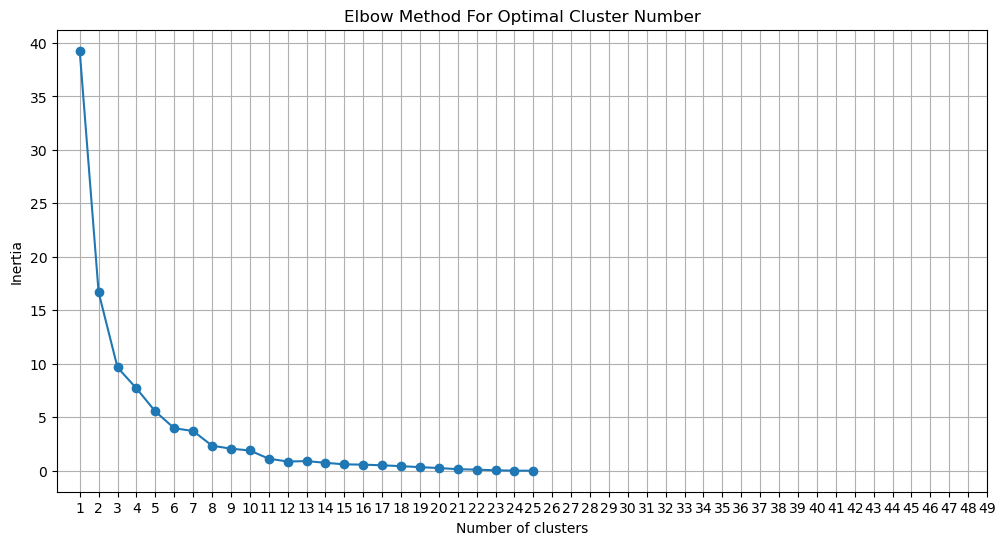

In [66]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import cdist_dtw
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train.T is your dataset and 'seed' is defined
n_cluster_range = range(1, 50)  # Adjust the range based on your dataset and computational resources
inertia = []

for n_clusters in n_cluster_range:
    print(f"Running DTW k-means with {n_clusters} clusters")
    model = TimeSeriesKMeans(n_clusters=n_clusters,
                             metric="dtw",
                            #  verbose=True,
                             verbose=False,
                             max_iter_barycenter=10,
                             random_state=seed)
    model.fit(X_train.T)
    inertia.append(model.inertia_)
    ### for debugging 
    print(f"Inertia for {n_clusters} clusters: {model.inertia_}")  # Additional print for 

# Plotting the inertia to find the elbow point
plt.figure(figsize=(12, 6))
plt.plot(n_cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(n_cluster_range)
plt.grid(True)
plt.show()


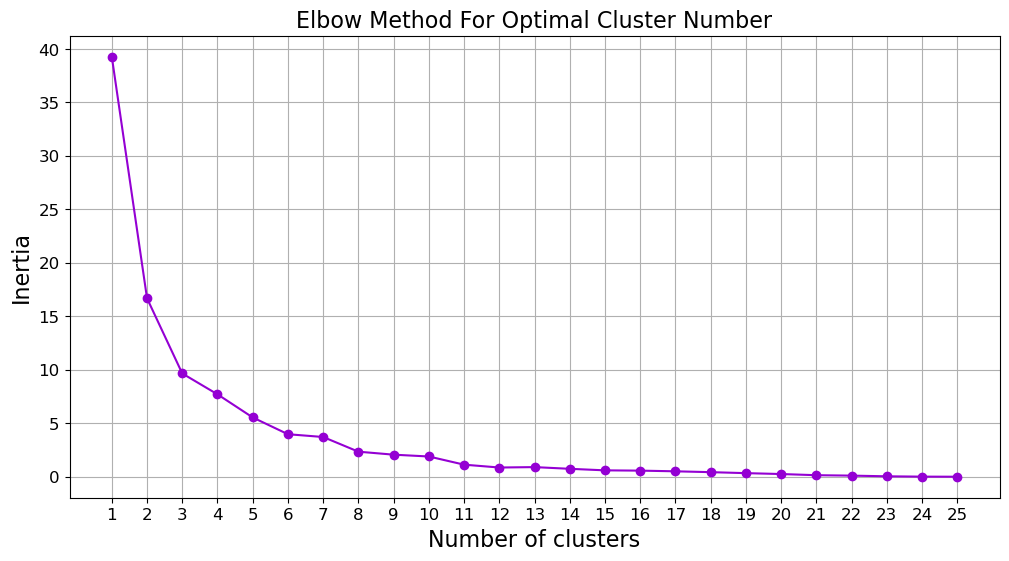

In [104]:
# Filter out infinite values and their corresponding cluster numbers
finite_inertia = [i for i in inertia if np.isfinite(i)]
n_cluster_finite = list(n_cluster_range)[:len(finite_inertia)]

# Plotting the inertia with finite values only
plt.figure(figsize=(12, 6))
plt.plot(n_cluster_finite, finite_inertia, marker='o', color='darkviolet')
plt.title('Elbow Method For Optimal Cluster Number', fontsize=16)
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.xticks(n_cluster_finite, fontsize=12)  # Increase x-axis ticks font size
plt.yticks(fontsize=12)
plt.grid()
plt.show()

In [11]:
import pandas as pd
import numpy as np

# Define the number of rows and columns for the DataFrame
num_rows = 24
num_cols = 12  # 12 item columns plus the 'time' column

# Create a date range for the 'time' column
time_column = pd.date_range(start='1/1/2018', periods=num_rows, freq='D').strftime('%-m/%-d/%Y')

# Initialize a random seed for reproducibility
np.random.seed(0)

# Generate random integers between 10 and 50 for the item columns
item_data = np.random.randint(10, 51, size=(num_rows, num_cols))

# Create the DataFrame with the 'time' column and the random item data
df= pd.DataFrame(item_data, columns=[f'item{i:02}' for i in range(1, num_cols+1)])
df.insert(0, 'time', time_column)

# Output the DataFrame to verify
df


,time,item01,item02,item03,item04,item05,item06,item07,item08,item09,item10,item11,item12
0,1/1/2018,10,13,13,49,19,29,31,46,33,16,34,34
1,1/2/2018,22,11,48,49,33,34,27,47,35,23,18,19
2,1/3/2018,30,26,15,25,10,28,45,34,39,29,29,24
3,1/4/2018,49,42,11,19,42,41,20,33,45,21,38,44
4,1/5/2018,10,10,46,15,48,50,27,25,14,41,11,11
5,1/6/2018,49,45,48,21,28,37,10,24,45,22,30,21
6,1/7/2018,14,16,14,13,22,46,50,24,25,30,45,33
7,1/8/2018,25,23,31,15,45,10,41,15,40,10,46,44
8,1/9/2018,39,13,44,23,49,31,19,10,20,33,12,44
9,1/10/2018,45,40,13,28,45,30,27,37,24,11,46,20


In [12]:
df.shape

(24, 13)

In [14]:
import matplotlib.pyplot as plt
from pylab import rcParams

/tmp/ipykernel_20589/3360252161.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df["time"], rotation = 45)


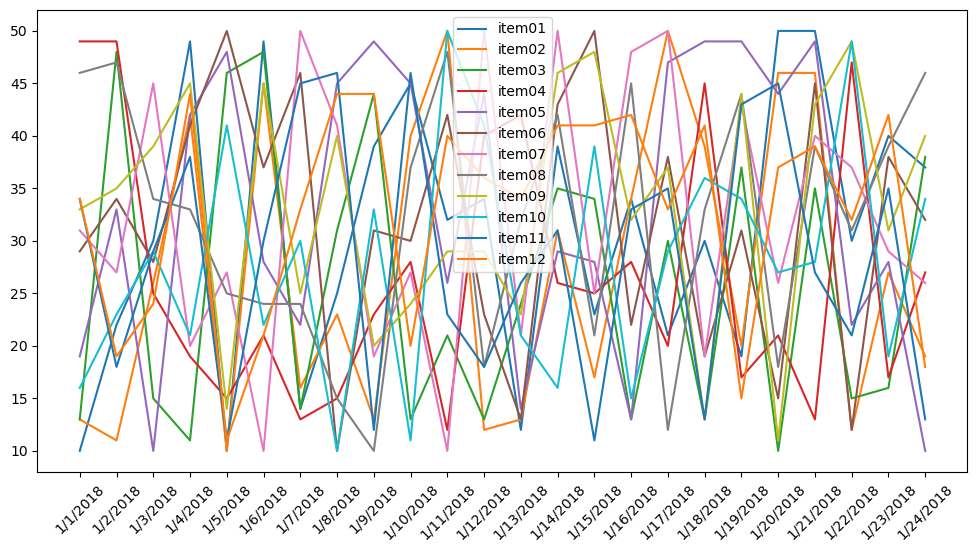

In [15]:
item_list = df.columns.tolist()[1:]
rcParams["figure.figsize"]= 12,6
fig = plt.figure(1)
ax = fig.add_subplot(111)
for item in item_list:
    plt.plot(df["time"], df[item], label=item)
ax.set_xticklabels(df["time"], rotation = 45)
plt.legend()
plt.show()

In [16]:
X_train = df.loc[:, df.columns != 'time']

In [18]:
# Euclidean k-means
seed = 111
from pylab import rcParams
from tslearn.clustering import TimeSeriesKMeans
from datetime import datetime
start_time = datetime.now()
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train.T)
print(y_pred)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Euclidean k-means
4405.667 --> 2313.567 --> 2313.567 --> 
[1 1 2 0 1 2 0 0 0 2 1 1]
Duration: 0:00:00.022899


/tmp/ipykernel_20589/775231355.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df["time"], rotation = 45)


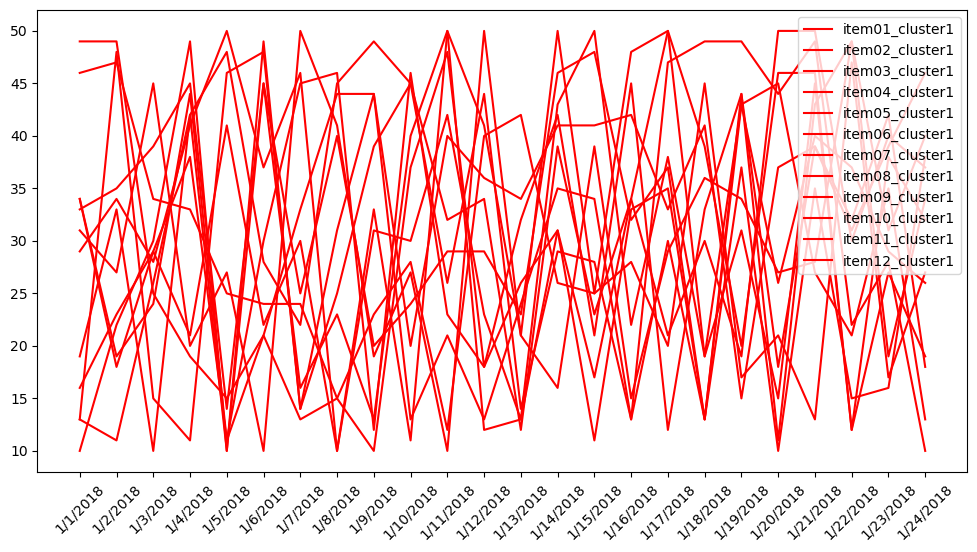

In [19]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams["figure.figsize"]= 12,6
rcParams["legend.loc"] = 'upper right'
item_list = df.columns.tolist()[1:]
colors = pd.DataFrame(y_pred).replace(0, "b").replace(1, "r").replace(2, "g")
fig = plt.figure(1)
ax = fig.add_subplot(111)
index = 0
for item in item_list:
    plt.plot(df["time"], df[item], label = item+"_cluster"+str(y_pred[index]), color=colors[0][index])
index += 1
ax.set_xticklabels(df["time"], rotation = 45)
plt.legend()
plt.show()

In [20]:
# DTW-k-means
from datetime import datetime
start_time = datetime.now()
print("DTW k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
    n_init=2,
    metric="dtw",
    verbose=True,
    max_iter_barycenter=10,
    random_state=seed)
y_pred = dba_km.fit_predict(X_train.T)
print(y_pred)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

DTW k-means
Init 1
1258.917 --> 856.133 --> 856.133 --> 
Init 2
1270.500 --> 825.706 --> 825.706 --> 
[1 1 1 0 1 2 2 0 0 1 2 2]
Duration: 0:00:00.551269


/tmp/ipykernel_20589/3039992375.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df["time"], rotation = 45)


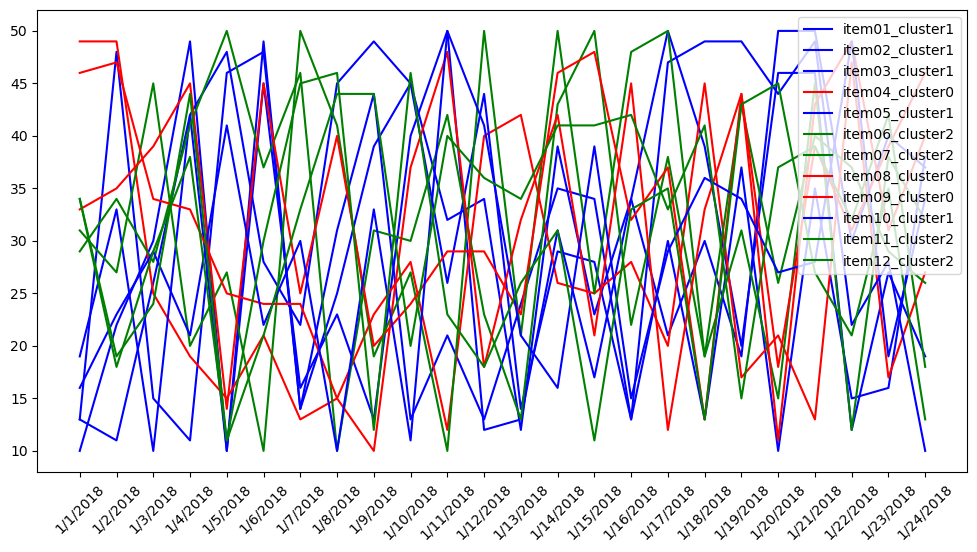

In [21]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams["figure.figsize"]= 12,6
rcParams["legend.loc"] = 'upper right'
item_list = df.columns.tolist()[1:]
colors = pd.DataFrame(y_pred).replace(0, "r").replace(1, "b").replace(2, "g")
fig = plt.figure(1)
ax = fig.add_subplot(111)
index = 0
for item in item_list:
    plt.plot(df["time"], df[item], label = item+"_cluster"+str(y_pred[index]), color=colors[0][index])
    index += 1
ax.set_xticklabels(df["time"], rotation = 45)
plt.legend()
plt.show()